#Install and Load Libraries

In [1]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers
import seaborn as sns
import keras_tuner as kt
from tensorflow import keras
from scipy.stats import entropy
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from scipy.linalg import sqrtm

In [4]:
tf.__version__

'2.18.0'

### Load and prepare the dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

# Exploratory Analysis

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

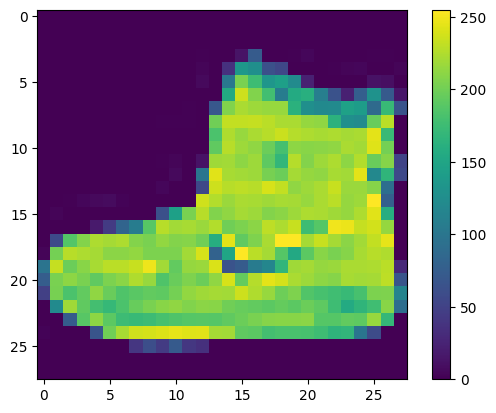

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

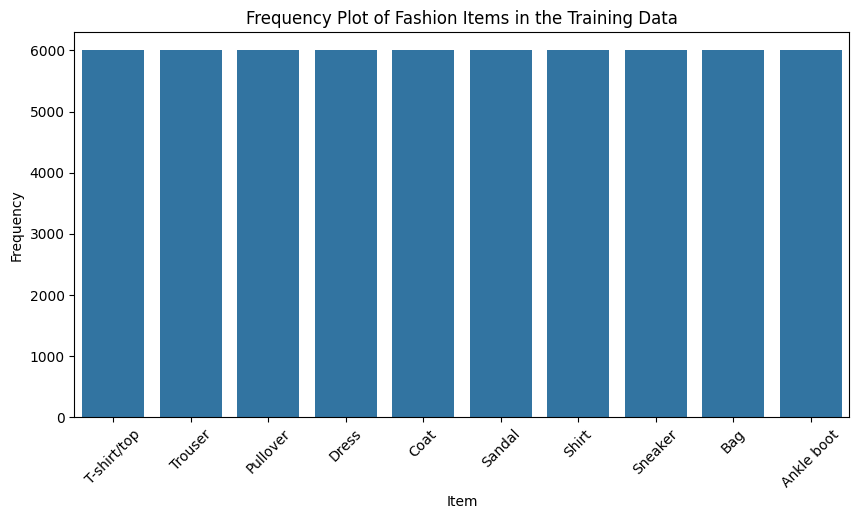

In [11]:
# Convert numeric labels to class names
train_labels_named = [class_names[label] for label in train_labels]

plt.figure(figsize=(10, 5))
sns.countplot(x=train_labels_named, order=class_names)  # Ensure labels are in the correct order
plt.xticks(rotation=45)
plt.title('Frequency Plot of Fashion Items in the Training Data')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.show()

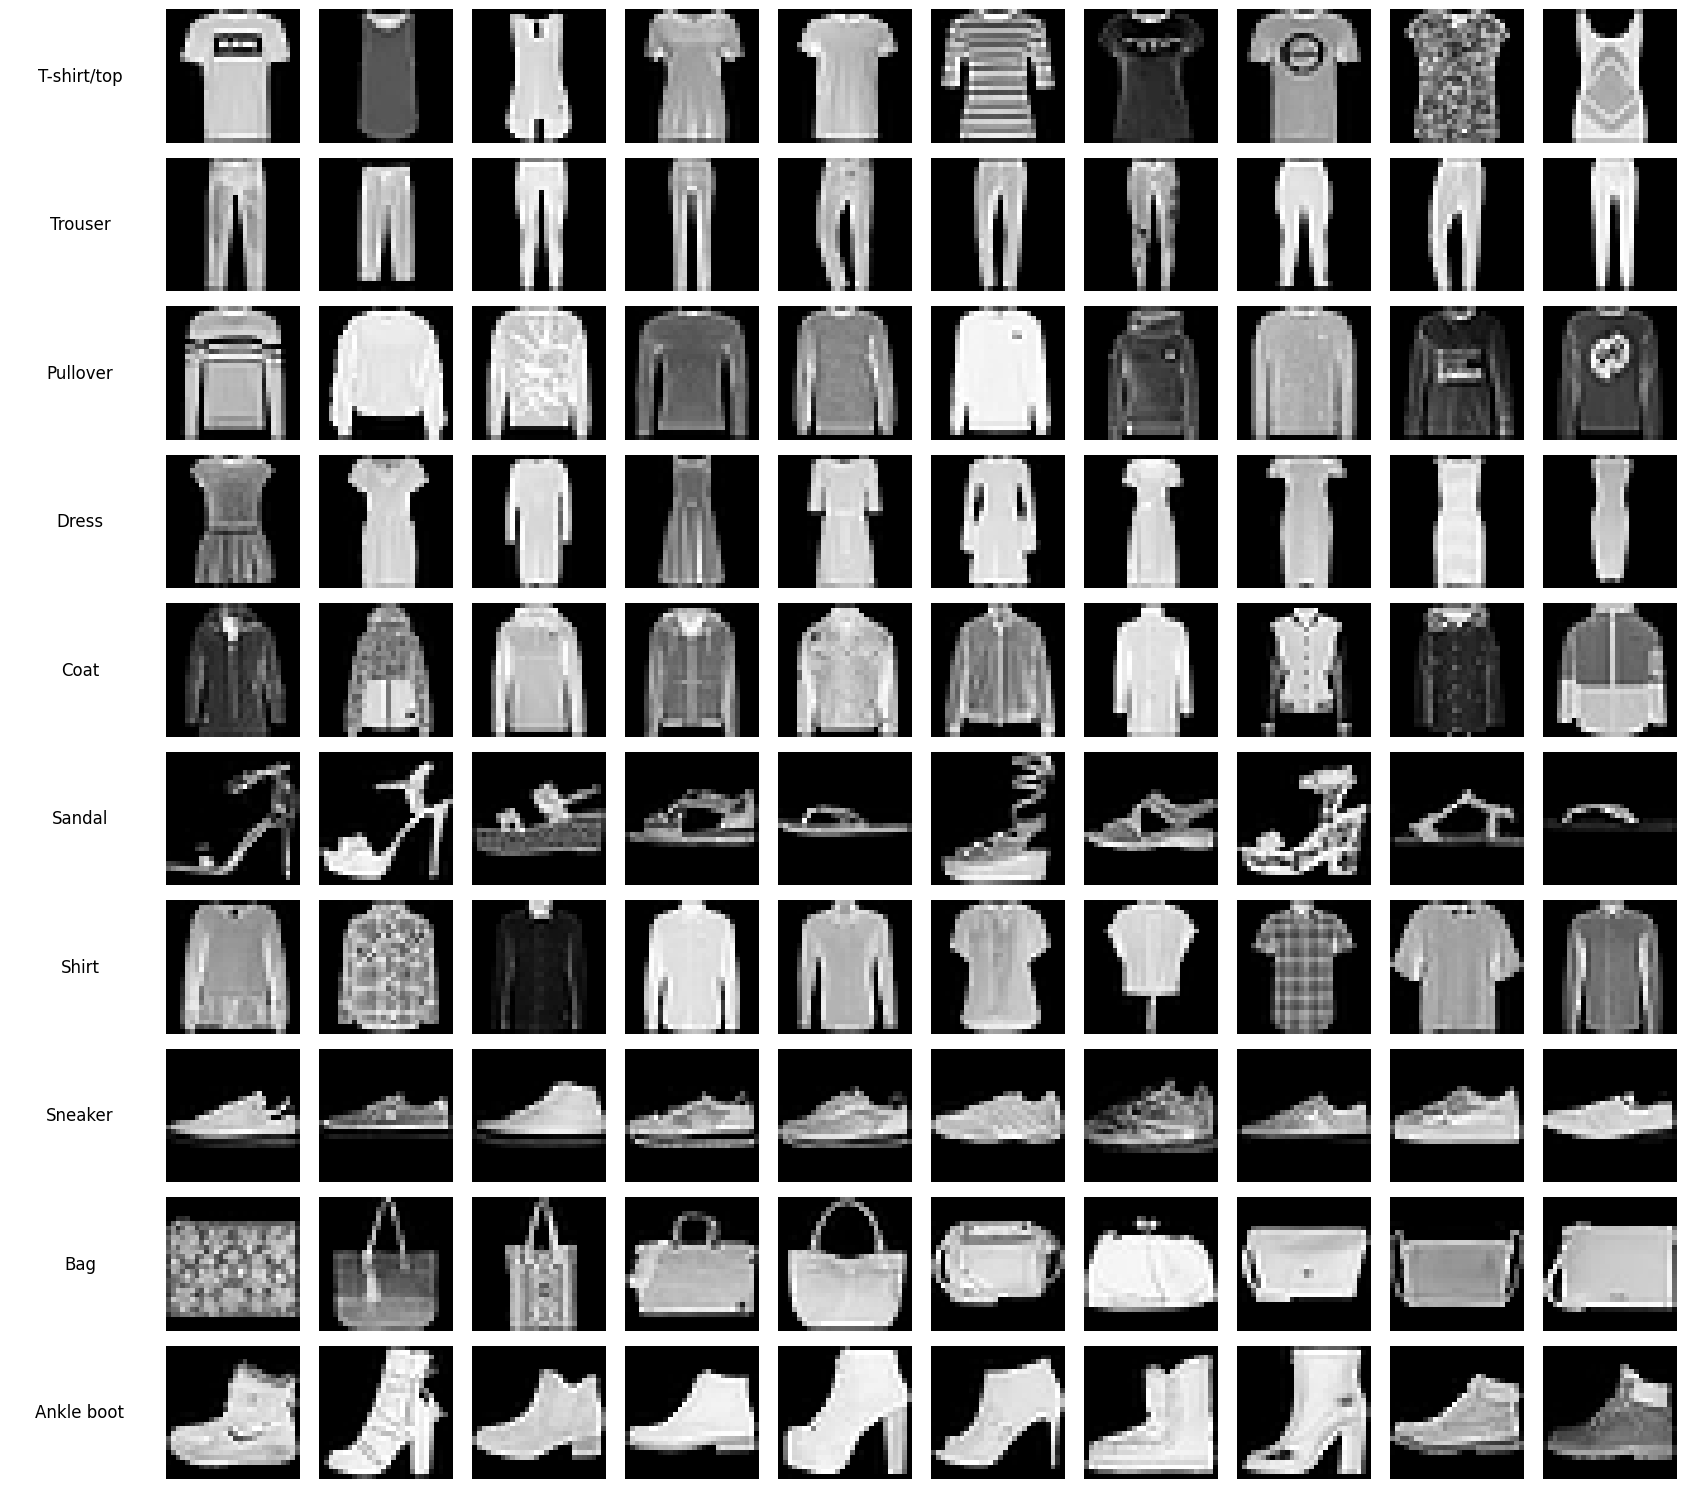

In [12]:
# Create a dictionary to store the first 10 images for each digit
item_images = {}
for item in range(10):
  item_images[item] = []

# Collect the first 10 images for each digit
for i in range(len(train_images)):
    digit = train_labels[i]
    if len(item_images[digit]) < 10:
        item_images[digit].append(train_images[i])

# Create the plot with an extra column for labels
fig, axes = plt.subplots(10, 11, figsize=(17, 15))  # 10 rows, 11 columns (1 for labels)

for i, item in enumerate(sorted(item_images.keys())):
    # Display label in the first column
    axes[i, 0].text(0.5, 0.5, class_names[item],
                    ha='center', va='center', fontsize=12)
    axes[i, 0].axis('off')  # Turn off axes for label cell

    # Display images in the remaining columns
    for j in range(10):
        axes[i, j + 1].imshow(item_images[item][j], cmap='gray')
        axes[i, j + 1].axis('off')

plt.tight_layout()
plt.show()

### Pre-processing

In [13]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [14]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
LATENT_DIM = 100
EPOCHS = 50

In [15]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Model Fitting

### Define Model Functions

In [16]:
# ----------------------
# Function to Create Generator (Tunable)
# ----------------------
def build_generator(hp):
    generator = keras.Sequential(name="Generator")
    generator.add(layers.Dense(7*7*hp.Choice('gen_filters', [128, 256, 512]), use_bias=False, input_shape=(LATENT_DIM,)))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())

    generator.add(layers.Reshape((7, 7, hp.Choice('gen_filters', [128, 256, 512]))))

    generator.add(layers.Conv2DTranspose(hp.Choice('gen_filters2', [64, 128]), (5, 5), strides=(1, 1), padding='same', use_bias=False))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())

    generator.add(layers.Conv2DTranspose(hp.Choice('gen_filters3', [32, 64]), (5, 5), strides=(2, 2), padding='same', use_bias=False))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())

    generator.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return generator

In [17]:
# ----------------------
# Function to Create Discriminator (Tunable)
# ----------------------
def build_discriminator(hp):
    discriminator = keras.Sequential(name="Discriminator")

    discriminator.add(layers.Conv2D(hp.Choice('disc_filters', [32, 64, 128]), (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    discriminator.add(layers.LeakyReLU())
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Conv2D(hp.Choice('disc_filters2', [64, 128, 256]), (5, 5), strides=(2, 2), padding='same'))
    discriminator.add(layers.LeakyReLU())
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Flatten())
    discriminator.add(layers.Dense(1, activation='sigmoid'))

    return discriminator

In [18]:
# ----------------------
# Training Step Function
# ----------------------
@tf.function
def train_step(generator, discriminator, generator_optimizer, discriminator_optimizer, images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    # Train the discriminator
    with tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        disc_loss = tf.keras.losses.BinaryCrossentropy()(tf.ones_like(real_output), real_output) + \
                    tf.keras.losses.BinaryCrossentropy()(tf.zeros_like(fake_output), fake_output)

    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as gen_tape:
        generated_images = generator(noise, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = tf.keras.losses.BinaryCrossentropy()(tf.ones_like(fake_output), fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return disc_loss, gen_loss

In [19]:
# ----------------------
# Generate and Save Sample Images
# ----------------------
def generate_and_save_images(generator, epoch, save_dir="generated_images"):
    os.makedirs(save_dir, exist_ok=True)
    noise = tf.random.normal([16, LATENT_DIM])
    generated_images = generator(noise, training=False)

    fig, axes = plt.subplots(4, 4, figsize=(5, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(generated_images[i, :, :, 0], cmap='gray')
        ax.axis('off')
    plt.savefig(f"{save_dir}/epoch_{epoch:03d}.png")
    plt.close()

In [20]:
# ----------------------
# Discriminator Evaluation
# ----------------------
def evaluate_discriminator(discriminator, epoch):
    noise = tf.random.normal([16, 28, 28, 1])  # Fake random images
    predictions = discriminator(noise, training=False)
    print(f"Epoch {epoch}: Discriminator Predictions on Random Noise:\n", predictions.numpy())


In [21]:
# ----------------------
# Function to Plot Losses
# ----------------------
def plot_losses(disc_losses, gen_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(disc_losses) + 1), disc_losses, label="Discriminator Loss")
    plt.plot(range(1, len(gen_losses) + 1), gen_losses, label="Generator Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("DCGAN Training Losses")
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
# ----------------------
# Full Training Loop with Inspection
# ----------------------
def train_dcgan(generator, discriminator, generator_optimizer, discriminator_optimizer):
    # Store losses for visualization
    disc_losses = []
    gen_losses = []

   # Restore latest checkpoint if available
    if checkpoint_manager.latest_checkpoint:
        checkpoint.restore(checkpoint_manager.latest_checkpoint)
        start_epoch = int(checkpoint.epoch.numpy())  # Resume from last saved epoch
        print(f"Restored from checkpoint {checkpoint_manager.latest_checkpoint}, resuming at epoch {start_epoch}")
    else:
        start_epoch = 1  # Start from scratch

    for epoch in range(start_epoch, EPOCHS + 1):
        epoch_disc_loss = 0
        epoch_gen_loss = 0
        num_batches = 0

        for image_batch in train_dataset:
            disc_loss, gen_loss = train_step(generator, discriminator, generator_optimizer, discriminator_optimizer, image_batch)

            epoch_disc_loss += disc_loss.numpy()
            epoch_gen_loss += gen_loss.numpy()
            num_batches += 1

        # Compute average loss for the epoch
        disc_losses.append(epoch_disc_loss / num_batches)
        gen_losses.append(epoch_gen_loss / num_batches)

        print(f"Epoch {epoch}: Generator Loss: {gen_losses[-1]:.4f}, Discriminator Loss: {disc_losses[-1]:.4f}")

        # Save checkpoint every 5 epochs
        if epoch % 5 == 0:
            checkpoint_manager.save()
            print(f"Checkpoint saved at epoch {epoch}")

        # Inspect the models each epoch
        generate_and_save_images(generator, epoch)
        evaluate_discriminator(discriminator, epoch)

    # Plot losses after training
    plot_losses(disc_losses, gen_losses)

In [24]:
# ----------------------
# Hyperparameter Tuning with Keras Tuner
# ----------------------
class DCGANHyperModel(kt.HyperModel):
    def build(self, hp):
        # Create generator and discriminator with tunable hyperparameters
        generator = build_generator(hp)
        discriminator = build_discriminator(hp)

        # Compile discriminator separately (needed for Keras Tuner compatibility)
        discriminator.compile(optimizer=keras.optimizers.Adam(1e-4),
                              loss="binary_crossentropy",
                              metrics=["accuracy"])

        return discriminator  # Keras Tuner expects a single model

In [25]:
# Set up tuner
tuner = kt.RandomSearch(
    DCGANHyperModel(),
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=3,  # Reduced for faster tuning
    executions_per_trial=1,
    directory="dcgan_tuning",
    project_name="fashion_mnist_dcgan"
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Summarize hyperparameters that Keras Tuner will explore
tuner.search_space_summary()

Search space summary
Default search space size: 5
gen_filters (Choice)
{'default': 128, 'conditions': [], 'values': [128, 256, 512], 'ordered': True}
gen_filters2 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128], 'ordered': True}
gen_filters3 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}
disc_filters (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
disc_filters2 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256], 'ordered': True}


In [26]:
# Create a subset of the dataset for tuning the discriminator
tune_images = train_images[:5000]  # Take a small subset for faster tuning
tune_labels = np.ones((5000, 1))  # Fake labels since Keras Tuner expects supervised data

# Run tuner on discriminator only (Generator will be trained later)
tuner.search(tune_images, tune_labels, epochs=3, batch_size=128, validation_split=0.2)


Trial 3 Complete [00h 00m 08s]
val_loss: 0.008962055668234825

Best val_loss So Far: 0.0010030019329860806
Total elapsed time: 00h 00m 34s


In [27]:
# Get best hyperparameters for discriminator
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [45]:
for hyperparameter, value in best_hps.values.items():
       print(f"{hyperparameter}: {value}")

gen_filters: 128
gen_filters2: 128
gen_filters3: 32
disc_filters: 64
disc_filters2: 256


In [28]:
# Create the best models
best_generator = build_generator(best_hps)
best_discriminator = build_discriminator(best_hps)

# Define optimizers for training
generator_optimizer = keras.optimizers.Adam(1e-4)
discriminator_optimizer = keras.optimizers.Adam(1e-4)

In [30]:
# ----------------------
# Define Checkpoint Manager
# ----------------------
checkpoint_dir = "dcgan_checkpoints"
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

# Create a checkpoint object to save and load models
checkpoint = tf.train.Checkpoint(generator=best_generator,
                                 discriminator=best_discriminator,
                                 generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer)

checkpoint_manager = tf.train.CheckpointManager(checkpoint, directory=checkpoint_dir, max_to_keep=5)

Epoch 1: Generator Loss: 1.2375, Discriminator Loss: 0.9424
Epoch 1: Discriminator Predictions on Random Noise:
 [[6.5720128e-04]
 [4.9262849e-04]
 [7.7671095e-05]
 [6.7440167e-05]
 [3.2576302e-04]
 [8.8571536e-04]
 [2.9148898e-04]
 [9.4366202e-04]
 [2.8147884e-05]
 [8.1146114e-05]
 [1.5674066e-04]
 [1.0066959e-03]
 [5.8832078e-04]
 [7.1458118e-05]
 [3.9517923e-04]
 [1.9914970e-04]]
Epoch 2: Generator Loss: 1.4900, Discriminator Loss: 0.8496
Epoch 2: Discriminator Predictions on Random Noise:
 [[0.00709671]
 [0.00046612]
 [0.00196112]
 [0.00279434]
 [0.00123073]
 [0.01526763]
 [0.00575247]
 [0.00108365]
 [0.00192974]
 [0.002725  ]
 [0.00172705]
 [0.00443128]
 [0.02022017]
 [0.00856735]
 [0.00968345]
 [0.00052524]]
Epoch 3: Generator Loss: 1.3928, Discriminator Loss: 1.0339
Epoch 3: Discriminator Predictions on Random Noise:
 [[1.5200822e-05]
 [3.6027221e-04]
 [4.3178279e-05]
 [1.7522416e-05]
 [2.2757129e-07]
 [5.1552517e-05]
 [1.1788292e-03]
 [1.6507887e-06]
 [6.8893947e-05]
 [1.537926

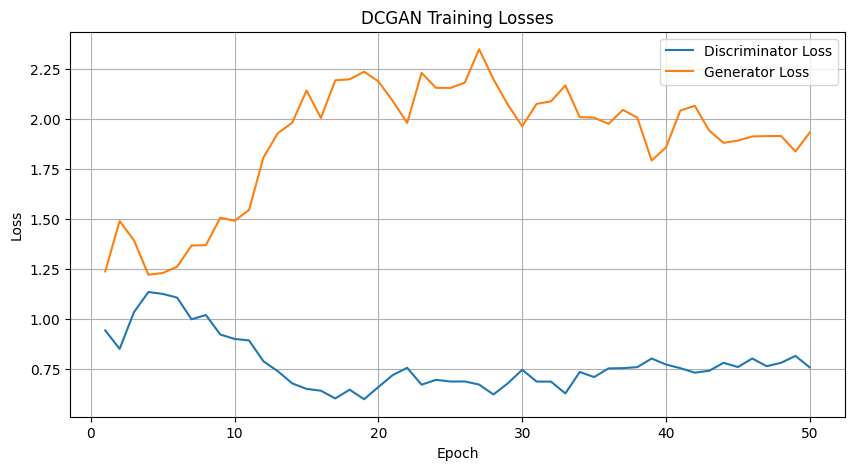

In [33]:
# Train the full DCGAN using the best models
train_dcgan(best_generator, best_discriminator, generator_optimizer, discriminator_optimizer)

# Model Evaluation


In [46]:
best_generator.summary()

Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6272)                │         627,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6272)                │          25,088 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 7, 7, 128)           │         409,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 14, 14, 32)          │         102,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 1)           │             800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,165,728 (4.45 MB)

 Trainable params: 1,152,864 (4.40 MB)

 Non-trainable params: 12,864 (50.25 KB)

In [47]:
best_discriminator.summary()

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 256)           │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,065 (1.62 MB)

 Trainable params: 424,065 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

### Visually comparing real and fake images

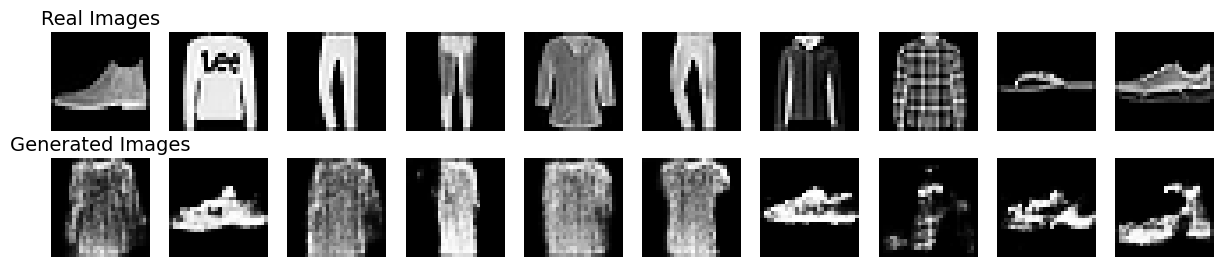

In [50]:
def compare_real_and_fake(generator, test_images, num_samples=10):
    noise = tf.random.normal([num_samples, LATENT_DIM])
    generated_images = generator(noise, training=False)

    fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 1.5, 3))

    for i in range(num_samples):
        # Ensure test_images is 4D; if 3D, no need for the last index
        real_image = test_images[i] if test_images.ndim == 3 else test_images[i, :, :, 0]
        fake_image = generated_images[i, :, :, 0]  # Generated images are always 4D

        # Show real images (from test set)
        axes[0, i].imshow(real_image, cmap="gray")
        axes[0, i].axis("off")

        # Show generated images
        axes[1, i].imshow(fake_image, cmap="gray")
        axes[1, i].axis("off")

    axes[0, 0].set_title("Real Images", fontsize=14)
    axes[1, 0].set_title("Generated Images", fontsize=14)
    plt.show()

# Compare real and generated images
compare_real_and_fake(best_generator, test_images)

### Inception Score

In [53]:
def calculate_inception_score(generator, num_samples=500):
    # Load InceptionV3 with include_top=False (allows flexible input sizes)
    inception_model = InceptionV3(include_top=False, weights="imagenet", pooling="avg")

    # Generate fake images
    noise = tf.random.normal([num_samples, LATENT_DIM])
    generated_images = generator(noise, training=False)

    # Resize images to 299x299x3 (required for InceptionV3)
    generated_images = tf.image.resize(generated_images, [299, 299])
    generated_images = tf.image.grayscale_to_rgb(generated_images)  # Convert grayscale to RGB
    generated_images = preprocess_input(generated_images)  # Normalize

    # Get classifier predictions (extract features using InceptionV3)
    preds = inception_model.predict(generated_images)

    # Compute the Inception Score
    p_yx = preds / preds.sum(axis=1, keepdims=True)  # Normalize
    p_y = np.mean(p_yx, axis=0)  # Marginal distribution
    kl_divergence = entropy(p_yx.T, p_y[:, np.newaxis])  # Compute KL divergence
    inception_score = np.exp(np.mean(kl_divergence))

    return inception_score

# Compute and print the Inception Score
is_score = calculate_inception_score(best_generator)
print(f"Inception Score: {is_score:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 769ms/step
Inception Score: 1.0573


### FID

In [60]:
# Ensure test images are preprocessed correctly BEFORE passing to FID function
def preprocess_test_images(test_images, num_samples=500):
    # Normalize test images
    test_images = (test_images.astype("float32") - 127.5) / 127.5

    # Ensure test_images has a channel dimension
    if test_images.ndim == 3:  # If shape is (num_samples, 28, 28)
        test_images = np.expand_dims(test_images, axis=-1)  # Add channel (num_samples, 28, 28, 1)

    # Select num_samples images
    test_images = test_images[:num_samples]

    # Resize images to 75x75
    test_images_resized = tf.image.resize(test_images, [75, 75], method=tf.image.ResizeMethod.BILINEAR)

    # Convert grayscale to RGB
    test_images_resized = tf.image.grayscale_to_rgb(test_images_resized)

    # Preprocess images for InceptionV3
    test_images_resized = preprocess_input(test_images_resized)

    return test_images_resized

def calculate_fid(generator, test_images, num_samples=500):
    # Load InceptionV3 model with correct input size
    inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(75, 75, 3))

    # Ensure test images are correctly preprocessed before passing
    test_images_resized = preprocess_test_images(test_images, num_samples)

    # Generate fake images
    noise = tf.random.normal([num_samples, LATENT_DIM])
    generated_images = generator(noise, training=False)

    # Resize generated images to match 75x75 size
    generated_images = tf.image.resize(generated_images, [75, 75], method=tf.image.ResizeMethod.BILINEAR)

    # Convert grayscale to RGB
    generated_images = tf.image.grayscale_to_rgb(generated_images)

    # Preprocess for InceptionV3
    generated_images = preprocess_input(generated_images)

    # Debugging: Print shapes before FID calculation
    print(f"Generated images shape: {generated_images.shape}")  # Should be (500, 75, 75, 3)
    print(f"Test images shape: {test_images_resized.shape}")  # Should be (500, 75, 75, 3)

    # Extract features from InceptionV3
    real_features = inception_model.predict(test_images_resized)
    fake_features = inception_model.predict(generated_images)

    # Compute mean and covariance of features
    mu_real, sigma_real = real_features.mean(axis=0), np.cov(real_features, rowvar=False)
    mu_fake, sigma_fake = fake_features.mean(axis=0), np.cov(fake_features, rowvar=False)

    # Compute Frechet Distance
    diff = mu_real - mu_fake
    cov_sqrt, _ = sqrtm(sigma_real @ sigma_fake, disp=False)  # Matrix square root of covariance product

    if np.iscomplexobj(cov_sqrt):
        cov_sqrt = cov_sqrt.real  # Remove imaginary part

    fid_score = np.sum(diff**2) + np.trace(sigma_real + sigma_fake - 2 * cov_sqrt)
    return fid_score

# Preprocess test images once before passing to FID function
(_, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

# Compute and print FID Score
fid_score = calculate_fid(best_generator, test_images)
print(f"FID Score: {fid_score:.4f}")


Generated images shape: (500, 75, 75, 3)
Test images shape: (500, 75, 75, 3)
16/16 ━━━━━━━━━━━━━━━━━━━━ 154s 490ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
FID Score: 124.5130


### Using the Discriminator on the test data

In [40]:
def evaluate_discriminator_on_test(discriminator, test_images, num_samples=500):
    noise = tf.random.normal([num_samples, LATENT_DIM])
    generated_images = best_generator(noise, training=False)

    # Get discriminator predictions
    real_predictions = discriminator(test_images[:num_samples], training=False)
    fake_predictions = discriminator(generated_images, training=False)

    real_acc = np.mean(real_predictions.numpy() > 0.5)
    fake_acc = np.mean(fake_predictions.numpy() < 0.5)

    print(f"Discriminator Accuracy on Real Images: {real_acc:.2%}")
    print(f"Discriminator Accuracy on Fake Images: {fake_acc:.2%}")

# Evaluate discriminator
evaluate_discriminator_on_test(best_discriminator, test_images)

Discriminator Accuracy on Real Images: 30.20%
Discriminator Accuracy on Fake Images: 91.80%
